## 1110. Delete Nodes And Return Forest

Given the **root** of a binary tree, each node in the tree has a distinct value.

After deleting all nodes with a value in **to_delete**, we are left with a forest (a disjoint union of trees).

Return the roots of the trees in the remaining forest. You may return the result in any order.

### Example 1:
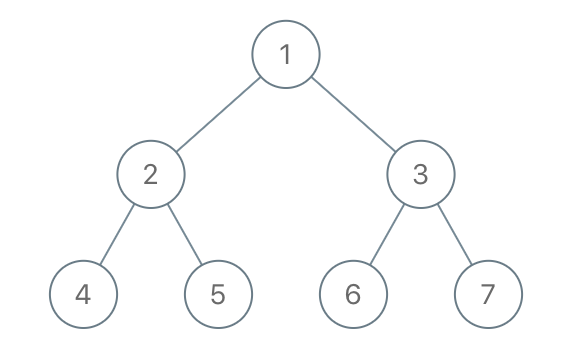

- **Input:** root = [1,2,3,4,5,6,7], to_delete = [3,5]
- **Output:** [[1,2,null,4],[6],[7]]

### Example 2:

- **Input:** root = [1,2,4,null,3], to_delete = [3]
- **Output:** [[1,2,4]]



In [ ]:
/**
 * Definition for a binary tree node.
 * struct TreeNode {
 *     int val;
 *     TreeNode *left;
 *     TreeNode *right;
 *     TreeNode() : val(0), left(nullptr), right(nullptr) {}
 *     TreeNode(int x) : val(x), left(nullptr), right(nullptr) {}
 *     TreeNode(int x, TreeNode *left, TreeNode *right) : val(x), left(left), right(right) {}
 * };
 */
class Solution {
public:
    vector<TreeNode*> delNodes(TreeNode* root, vector<int>& to_delete) {
        unordered_set<int> inDelete(to_delete.begin(), to_delete.end());
        
        vector<TreeNode*> ans;
        helper(root, root, inDelete, ans);

        return ans;
    }

    void helper(TreeNode* parent, TreeNode * cur, const unordered_set<int> & inDelete, vector<TreeNode*> & ans) 
    {
        if (!cur) return;

        // root node of the original tree
        if (cur == parent and !inDelete.contains(cur->val)) 
        {
            ans.push_back(cur);
        }

        if (inDelete.contains(cur->val))
        {
            if (parent and cur == parent->left) parent->left = nullptr;
            if (parent and cur == parent->right) parent->right = nullptr;

            if (cur->left and !inDelete.contains(cur->left->val)) ans.push_back(cur->left);
            if (cur->right and !inDelete.contains(cur->right->val)) ans.push_back(cur->right);
        } 
        else
        {
            parent = cur;
        }

        helper(parent, cur->left, inDelete, ans);
        helper(parent, cur->right, inDelete, ans);
    }

};